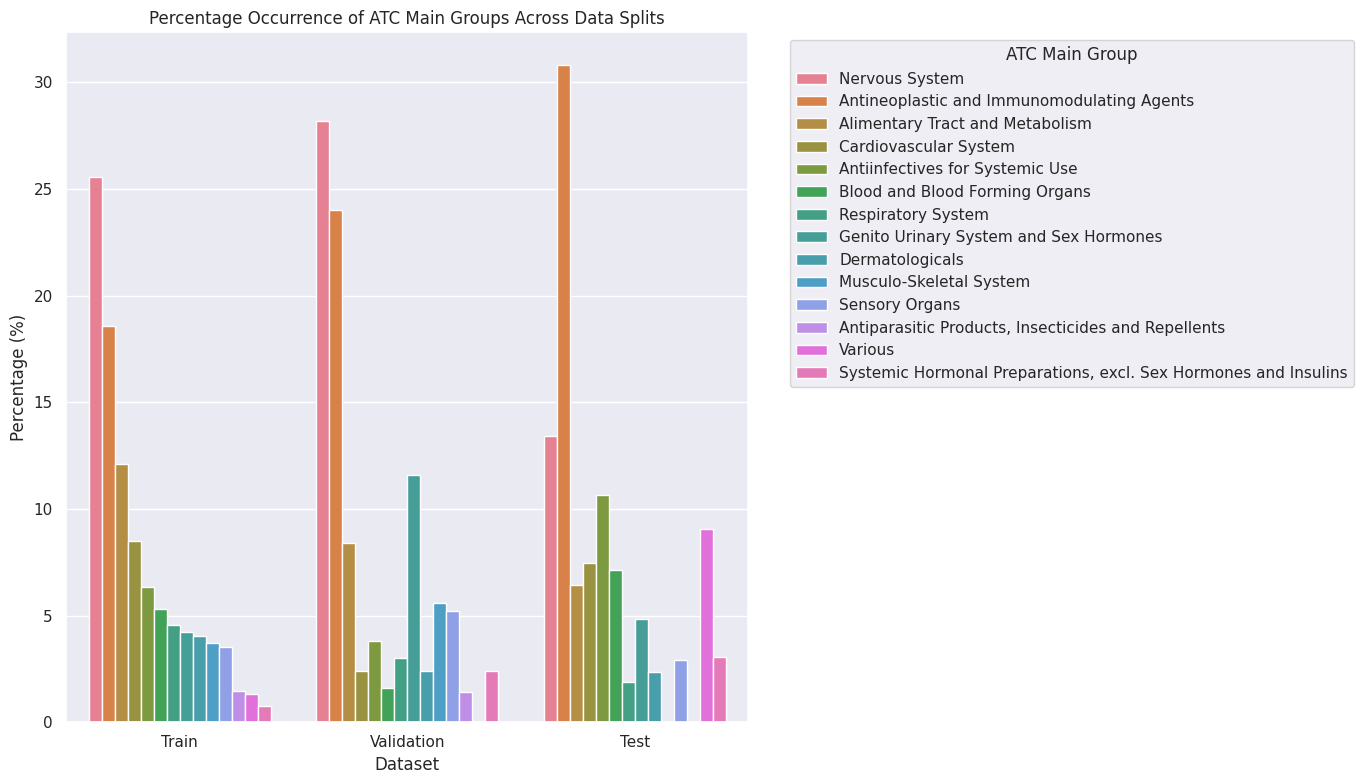

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Define the ATC labels
atc_labels = {
    "[NOATCM]": "Not Classified",
    "a": "Alimentary Tract and Metabolism",
    "b": "Blood and Blood Forming Organs",
    "c": "Cardiovascular System",
    "d": "Dermatologicals",
    "g": "Genito Urinary System and Sex Hormones",
    "h": "Systemic Hormonal Preparations, excl. Sex Hormones and Insulins",
    "j": "Antiinfectives for Systemic Use",
    "l": "Antineoplastic and Immunomodulating Agents",
    "m": "Musculo-Skeletal System",
    "n": "Nervous System",
    "p": "Antiparasitic Products, Insecticides and Repellents",
    "r": "Respiratory System",
    "s": "Sensory Organs",
    "v": "Various",
}

# Create a color palette excluding '[NOATCM]' for visualization
palette = sns.color_palette("husl", len(atc_labels) - 1)  # '-1' to exclude '[NOATCM]'


def calculate_percentage(df, dataset_name):
    df_filtered = df[df["atc_anatomical_main_group"] != "[NOATCM]"]
    total = len(df_filtered)
    percentage = df_filtered["atc_anatomical_main_group"].value_counts() / total * 100
    percentage.index = percentage.index.map(atc_labels)  # Map ATC codes to descriptions
    return pd.DataFrame(
        {
            "ATC Main Group": percentage.index,
            "Percentage": percentage.values,
            "Dataset": dataset_name,
        }
    )


# Load datasets
train_df = pd.read_csv("../data/classification/smiles/full_clean/train.csv")
val_df = pd.read_csv("../data/classification/smiles/full_clean/val.csv")
test_df = pd.read_csv("../data/classification/smiles/full_clean/test.csv")

# Calculate percentages for each dataset
train_percentage = calculate_percentage(train_df, "Train")
val_percentage = calculate_percentage(val_df, "Validation")
test_percentage = calculate_percentage(test_df, "Test")

# Combine all data
combined_percentages = pd.concat([train_percentage, val_percentage, test_percentage])

plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

sns.barplot(
    x="Dataset",
    y="Percentage",
    hue="ATC Main Group",
    data=combined_percentages,
    palette=palette,
)
plt.title("Percentage Occurrence of ATC Main Groups Across Data Splits")
plt.ylabel("Percentage (%)")
plt.legend(title="ATC Main Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

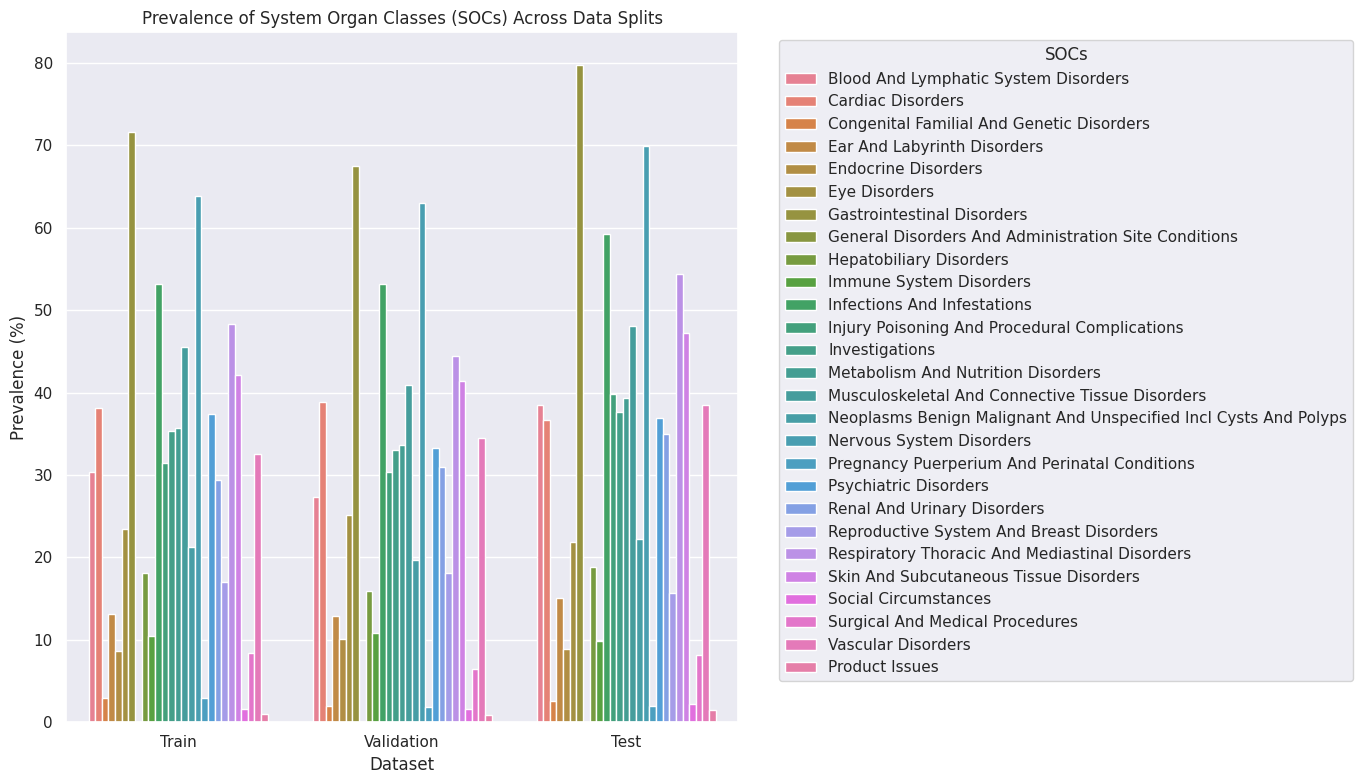

In [2]:
def calculate_metric_percentage(df, dataset_name):
    # Assuming health disorder metrics start from column index 14
    soc_metrics = df.iloc[:, 14:]
    percentages = soc_metrics.mean() * 100  # Multiply by 100 for percentage
    return pd.DataFrame(
        {
            "SOC Metric": percentages.index,
            "Percentage": percentages.values,
            "Dataset": dataset_name,
        }
    )


# Load datasets
train_df = pd.read_csv("../data/classification/smiles/full_clean/train.csv")
val_df = pd.read_csv("../data/classification/smiles/full_clean/val.csv")
test_df = pd.read_csv("../data/classification/smiles/full_clean/test.csv")

# Calculate percentages
train_percentages = calculate_metric_percentage(train_df, "Train")
val_percentages = calculate_metric_percentage(val_df, "Validation")
test_percentages = calculate_metric_percentage(test_df, "Test")

# Combine all data
combined_percentages = pd.concat([train_percentages, val_percentages, test_percentages])

# Improve readability of health disorder metrics
combined_percentages["SOC Metric"] = (
    combined_percentages["SOC Metric"].str.replace("_", " ").str.title()
)

# Plot configuration
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Create a color palette
palette = sns.color_palette("husl", len(combined_percentages["SOC Metric"].unique()))

sns.barplot(
    x="Dataset",
    y="Percentage",
    hue="SOC Metric",
    data=combined_percentages,
    palette=palette,
)
plt.title("Prevalence of System Organ Classes (SOCs) Across Data Splits")
plt.ylabel("Prevalence (%)")
plt.xlabel("Dataset")
plt.legend(title="SOCs", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()